# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [458]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [459]:
df= pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [461]:
df.shape

(12316, 32)

In [462]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [463]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [464]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1816,21:00:00,Friday,Over 51,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Reversing,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
2177,9:57:00,Wednesday,31-50,Male,NaN,Owner,5-10yr,Lorry (11?40Q),Owner,Above 10yr,...,Going straight,Pedestrian,Male,18-30,2,Driver,NaN,Unknown or other,Changing lane to the left,Slight Injury
5872,6:28:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Getting off the vehicle improperly,Slight Injury
2247,14:23:00,Sunday,18-30,Male,Above high school,Other,2-5yr,Taxi,Owner,NaN,...,Going straight,Passenger,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
6221,12:40:00,Wednesday,Over 51,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5324,16:10:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
11099,9:45:00,Monday,Over 51,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Overtaking,Passenger,Female,Under 18,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
6611,8:39:00,Thursday,Over 51,Male,Junior high school,Employee,2-5yr,Other,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
10230,16:56:00,Friday,Over 51,Male,Elementary school,Employee,1-2yr,Public (> 45 seats),Owner,5-10yrs,...,Getting off,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Getting off the vehicle improperly,Slight Injury
10208,19:25:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,2-5yrs,...,Moving Backward,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury


In [465]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [466]:
cat_col = df.select_dtypes(exclude='number')

In [467]:
cat_col.describe().T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [468]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [469]:
df.isna().mean()*100

Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

In [470]:
df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [471]:
drop_rows=['Educational_level','Vehicle_driver_relation','Driving_experience','Owner_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Road_surface_type',
          'Type_of_collision','Vehicle_movement']
df.dropna(subset=drop_rows, inplace=True)

In [472]:
df['Defect_of_vehicle'].unique() #No need this column

array(['No defect', nan, '7', '5'], dtype=object)

In [473]:
df['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
Unknown       2319
2-5yrs        1521
Above 10yr    1123
5-10yrs       1093
1-2yr          649
Below 1yr      236
Name: count, dtype: int64

In [474]:
df['Age_band_of_casualty'].value_counts() 

Age_band_of_casualty
na          3527
18-30       2516
31-50       1950
Under 18     817
Over 51      797
5            189
Name: count, dtype: int64

In [475]:
drop_col = ['Defect_of_vehicle','Service_year_of_vehicle','Age_band_of_casualty', 'Work_of_casuality', 'Fitness_of_casuality']
df = df.drop(columns=drop_col, axis=1)

In [476]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile              2555
Lorry (41?100Q)         1738
Other                    971
Pick up upto 10Q         658
Public (12 seats)        572
Stationwagen             538
Public (13?45 seats)     439
Lorry (11?40Q)           419
Public (> 45 seats)      329
Long lorry               305
Taxi                     204
Motorcycle               153
Special vehicle           71
Ridden horse              51
Turbo                     38
Bajaj                     24
Bicycle                   17
Name: count, dtype: int64

In [477]:
df['Types_of_Junction'].value_counts()

Types_of_Junction
Y Shape        3618
No junction    3079
Crossing       1701
Other           345
Unknown         156
O Shape         135
T Shape          52
X Shape           7
Name: count, dtype: int64

In [478]:
df['Types_of_Junction'].fillna('Unknown', inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)

In [479]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [480]:
# convert time to date-time type
df['Time'] = pd.to_datetime(df['Time'])

C:\Users\hayoo\AppData\Local\Temp\ipykernel_29108\1948108490.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [481]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

num_col = df.select_dtypes(include='number')
num_col

,Number_of_vehicles_involved,Number_of_casualties
1,2,2
3,2,2
4,2,2
7,2,1
8,2,1
...,...,...
12309,2,2
12312,2,1
12313,1,1
12314,2,1


In [482]:
df_scaled=pd.DataFrame(scaler.fit_transform(num_col),columns=num_col.columns)

In [483]:
df_scaled.head()

,Number_of_vehicles_involved,Number_of_casualties
0,0.166667,0.142857
1,0.166667,0.142857
2,0.166667,0.142857
3,0.166667,0.000000
4,0.166667,0.000000


In [484]:
df['Number_of_vehicles_involved']=df_scaled['Number_of_vehicles_involved']
df['Number_of_casualties']=df_scaled['Number_of_casualties']

In [485]:
# Label Encoding:
label_encoder = LabelEncoder()

df['Day_of_week']= label_encoder.fit_transform(df['Day_of_week'])
df['Educational_level']= label_encoder.fit_transform(df['Educational_level'])
df['Type_of_vehicle']= label_encoder.fit_transform(df['Type_of_vehicle'])
df['Cause_of_accident']= label_encoder.fit_transform(df['Cause_of_accident'])
df['Accident_severity']= label_encoder.fit_transform(df['Accident_severity'])
df['Age_band_of_driver']= label_encoder.fit_transform(df['Age_band_of_driver'])
df['Owner_of_vehicle']=label_encoder.fit_transform(df['Owner_of_vehicle'])
df['Driving_experience']= label_encoder.fit_transform(df['Driving_experience'])


In [486]:
#Encoding sex of driver
mapping= {"Male":0,"Female":1,"Unknown":2}
df["Sex_of_driver_encoding"]=df["Sex_of_driver"].map(mapping)

In [487]:
#on_hot
df=pd.get_dummies(df, columns=['Sex_of_casualty'])

In [488]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Sex_of_driver_encoding,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_na
1,2024-08-01 17:02:00,1,1,Male,4,Employee,3,11,3,Office areas,...,Going straight,na,na,Not a Pedestrian,16,2,0,False,False,True
3,2024-08-01 01:06:00,3,0,Male,4,Employee,2,11,0,Office areas,...,Going straight,Pedestrian,3,Not a Pedestrian,1,2,0,True,False,False
4,2024-08-01 01:06:00,3,0,Male,4,Employee,1,0,3,Industrial areas,...,Going straight,na,na,Not a Pedestrian,16,2,0,False,False,True
7,2024-08-01 17:20:00,0,0,Male,4,Employee,1,0,0,Residential areas,...,U-Turn,na,na,Not a Pedestrian,12,2,0,False,False,True
8,2024-08-01 17:20:00,0,0,Male,4,Employee,3,5,3,Industrial areas,...,Going straight,Pedestrian,3,Crossing from driver's nearside,1,2,0,False,True,False


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9796 entries, 1 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         9796 non-null   datetime64[ns]
 1   Day_of_week                  9796 non-null   int32         
 2   Age_band_of_driver           9796 non-null   int32         
 3   Sex_of_driver                9796 non-null   object        
 4   Educational_level            9796 non-null   int32         
 5   Vehicle_driver_relation      9796 non-null   object        
 6   Driving_experience           9796 non-null   int32         
 7   Type_of_vehicle              9796 non-null   int32         
 8   Owner_of_vehicle             9796 non-null   int32         
 9   Area_accident_occured        9796 non-null   object        
 10  Lanes_or_Medians             9796 non-null   object        
 11  Road_allignment              9796 non-null   ob

<function matplotlib.pyplot.show(close=None, block=None)>

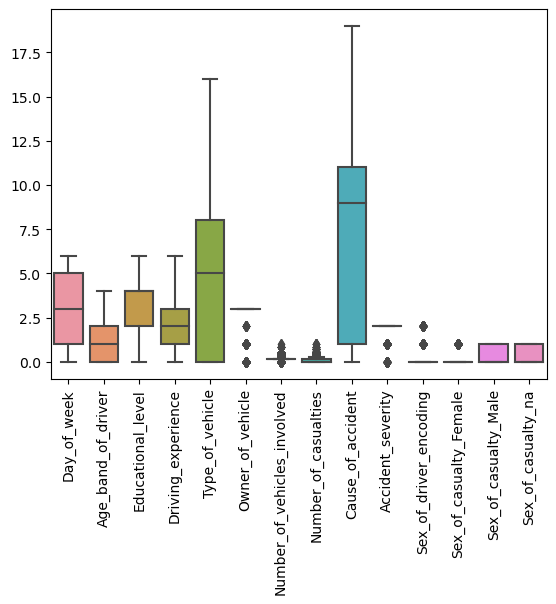

In [490]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show

In [491]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Number_of_casualties')


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [492]:
nume_col=df.select_dtypes(include='number')

correlation=nume_col.corr()
correlation

,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Accident_severity,Sex_of_driver_encoding
Day_of_week,1.000000,-0.005931,-0.008621,-0.004090,0.001801,0.001358,0.013264,0.006512,0.007510,-0.007635,-0.001238
Age_band_of_driver,-0.005931,1.000000,0.023128,-0.018354,0.007215,0.004176,0.010636,-0.011917,0.003109,0.025068,0.275278
Educational_level,-0.008621,0.023128,1.000000,0.038279,0.009938,-0.016125,-0.014213,-0.010671,0.000446,0.004864,0.002357
Driving_experience,-0.004090,-0.018354,0.038279,1.000000,0.007916,-0.008104,-0.006676,-0.011170,-0.001858,-0.001667,0.009159
Type_of_vehicle,0.001801,0.007215,0.009938,0.007916,1.000000,-0.011235,-0.001397,-0.004980,-0.012189,-0.004492,0.013246
Owner_of_vehicle,0.001358,0.004176,-0.016125,-0.008104,-0.011235,1.000000,0.003036,-0.004278,0.005595,-0.005267,-0.001754
Number_of_vehicles_involved,0.013264,0.010636,-0.014213,-0.006676,-0.001397,0.003036,1.000000,0.166311,-0.009983,-0.035841,0.016252
Number_of_casualties,0.006512,-0.011917,-0.010671,-0.011170,-0.004980,-0.004278,0.166311,1.000000,0.011516,-0.025071,-0.017466
Cause_of_accident,0.007510,0.003109,0.000446,-0.001858,-0.012189,0.005595,-0.009983,0.011516,1.000000,0.006651,0.006661
Accident_severity,-0.007635,0.025068,0.004864,-0.001667,-0.004492,-0.005267,-0.035841,-0.025071,0.006651,1.000000,0.022425


<Axes: >

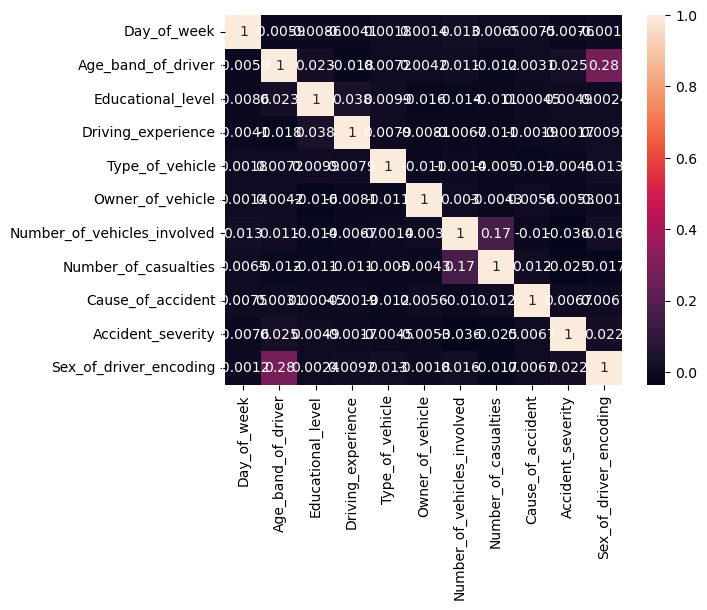

In [493]:
sns.heatmap(correlation, annot=True)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\hayoo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


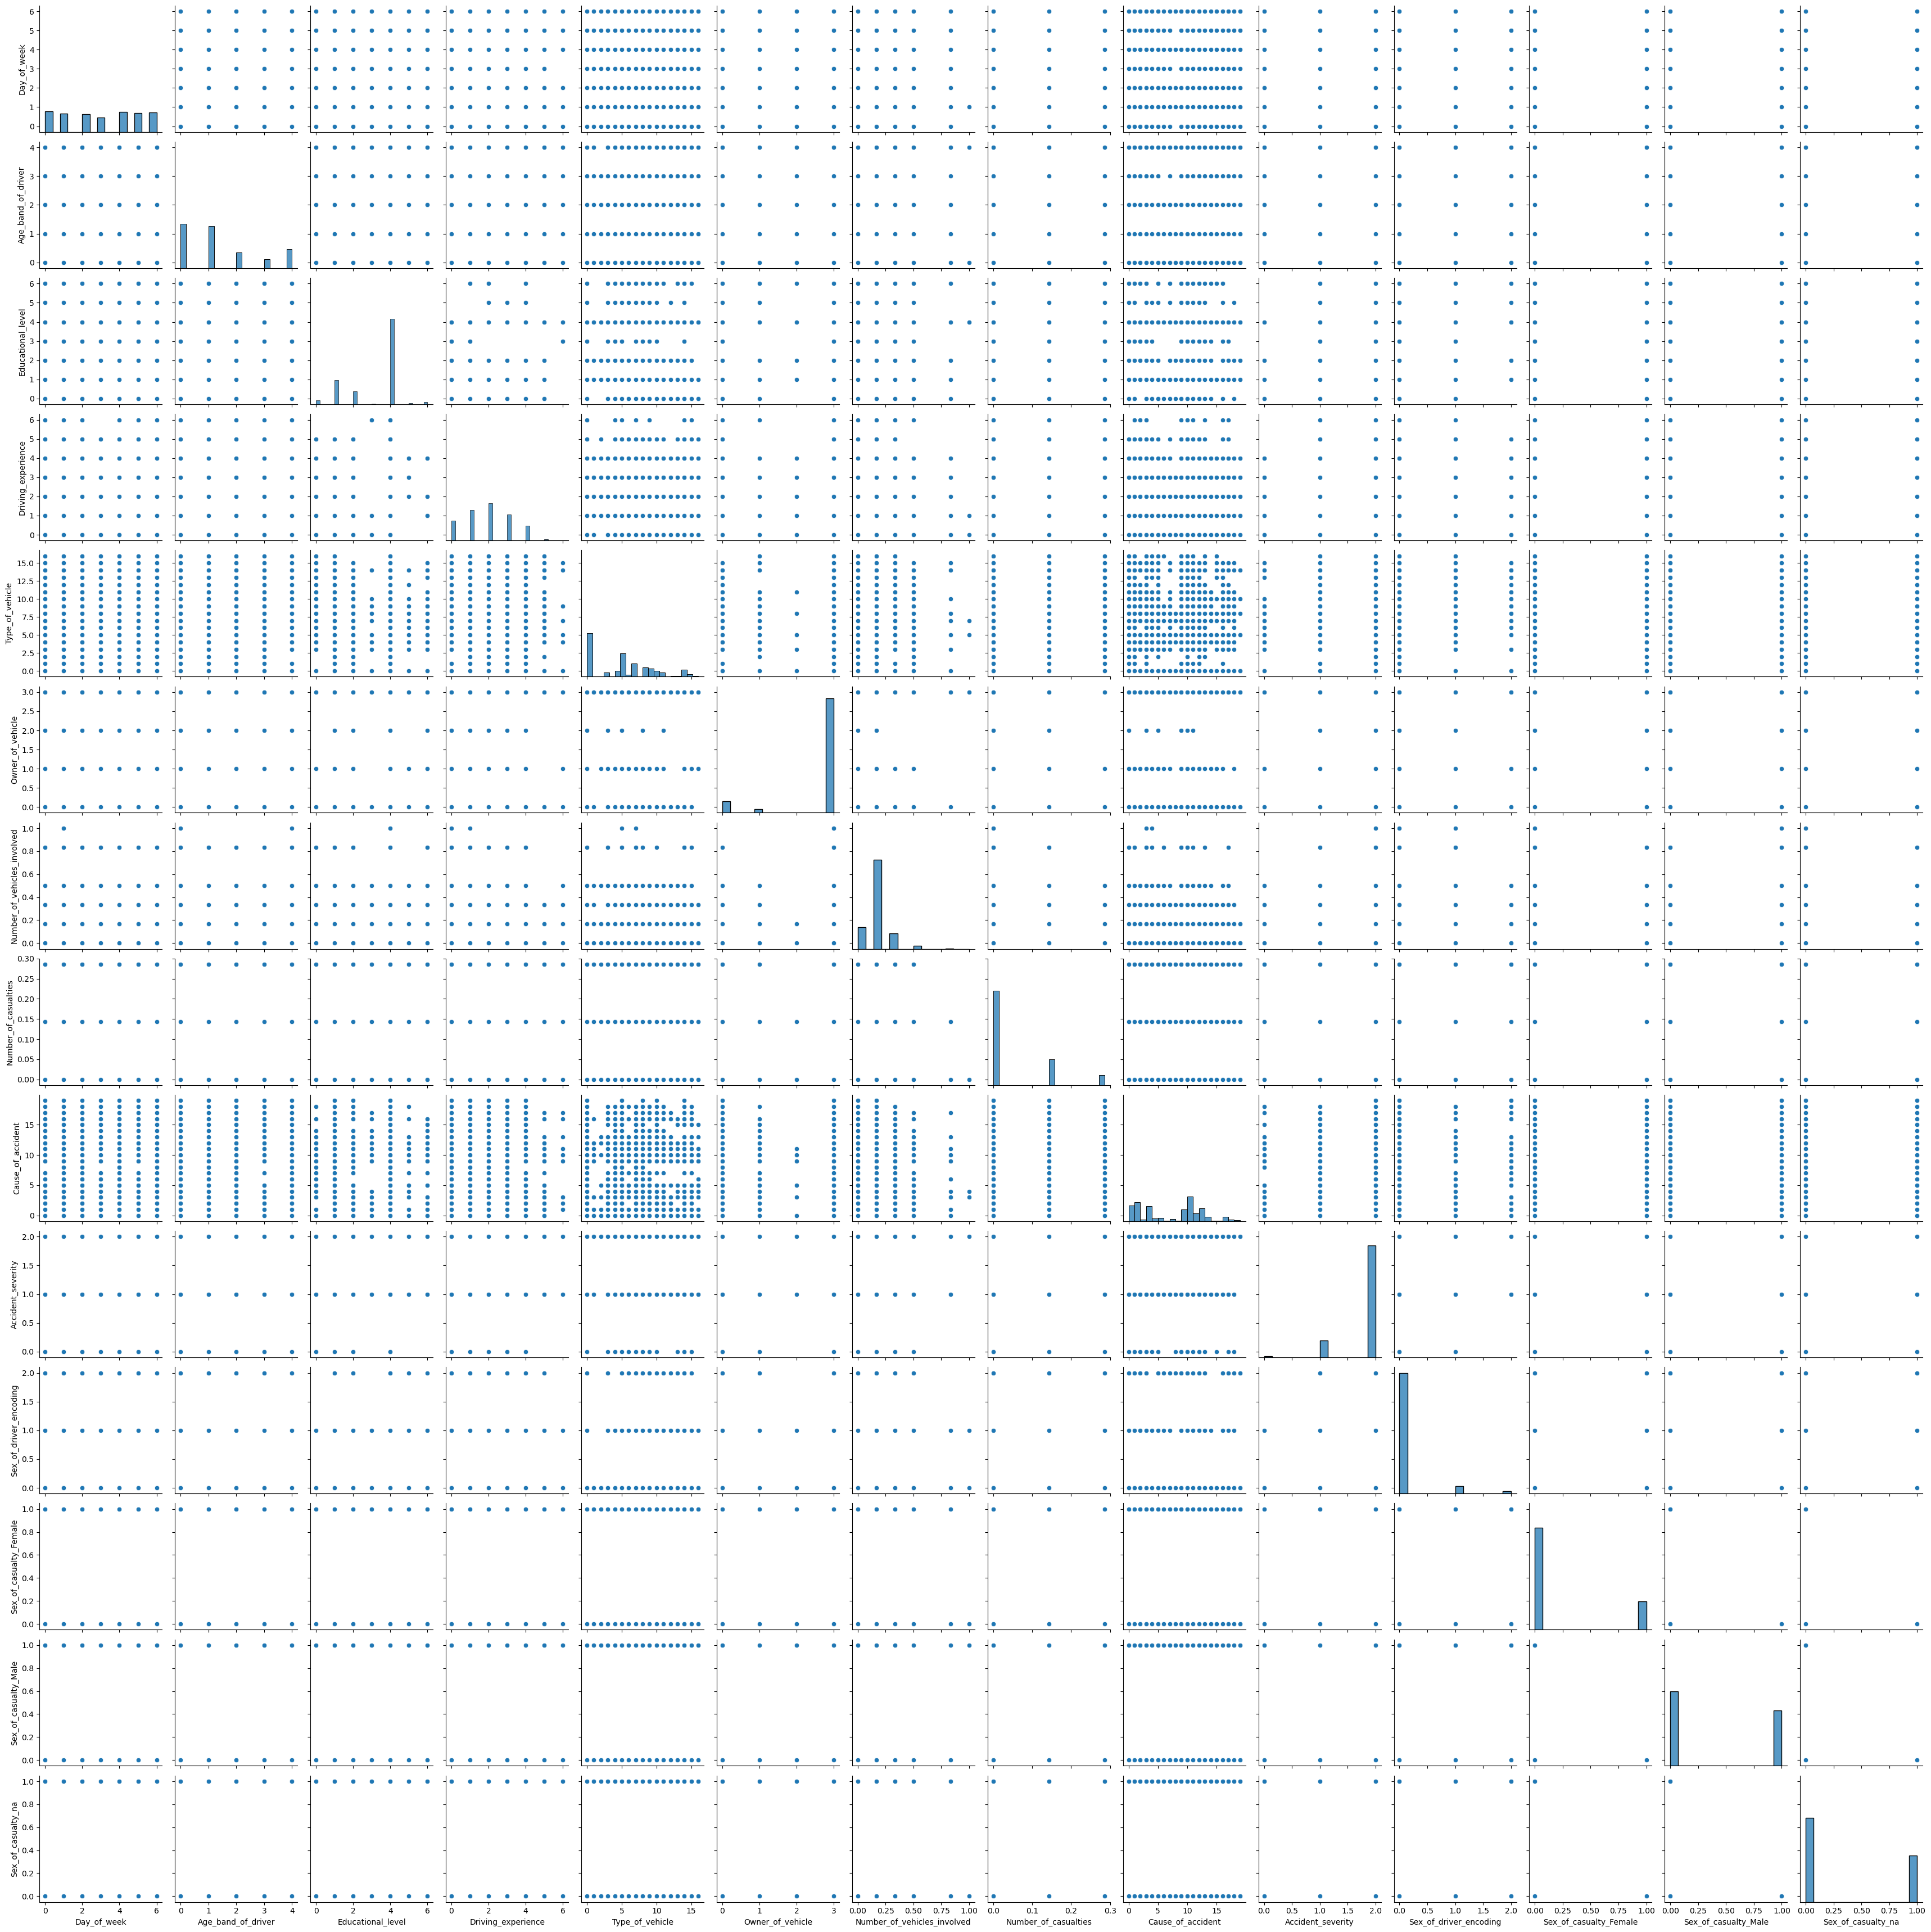

In [494]:
sns.pairplot(df)

C:\Users\hayoo\AppData\Local\Temp\ipykernel_29108\3085048679.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=30, figsize=(20, 20), layout=(5, 3), ax=axes)


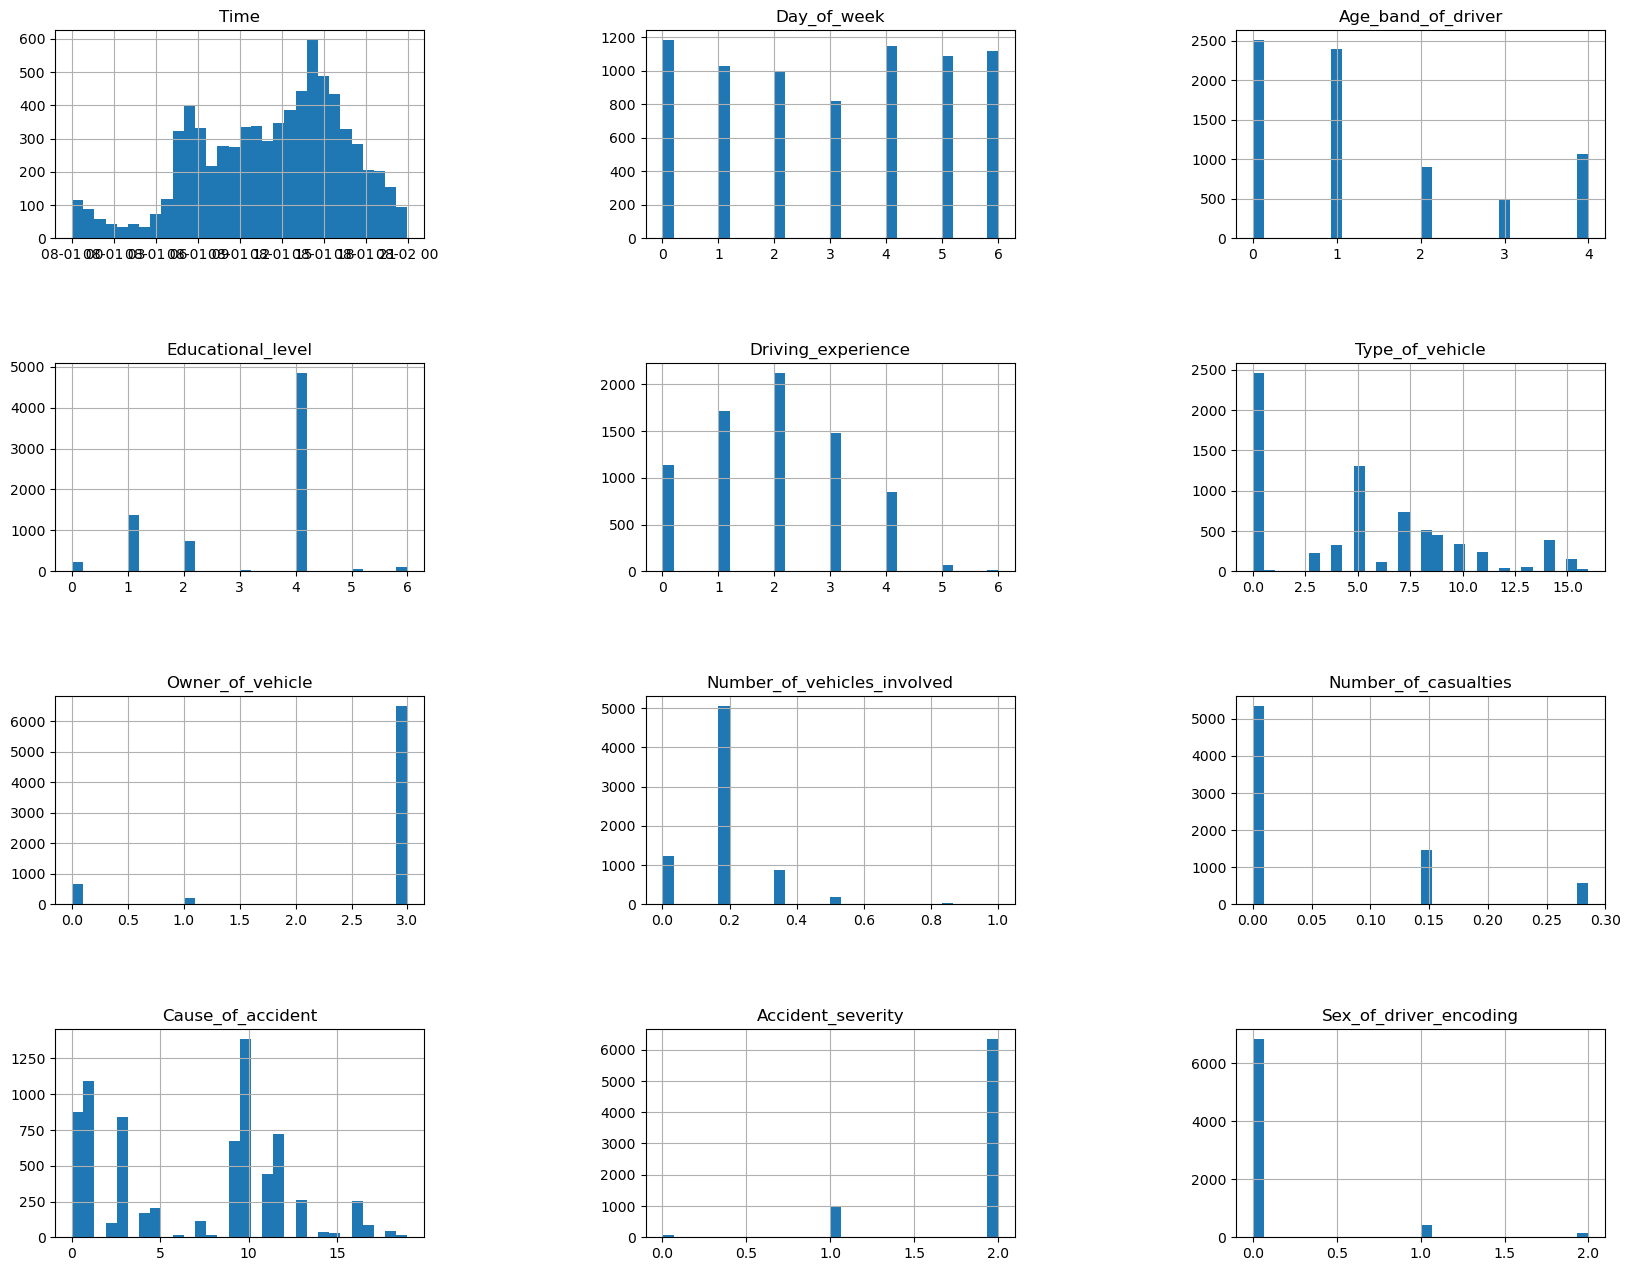

In [495]:
fig, axes = plt.subplots(figsize=(20, 20))
df.hist(bins=30, figsize=(20, 20), layout=(5, 3), ax=axes)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.show()

<Axes: xlabel='Sex_of_driver'>

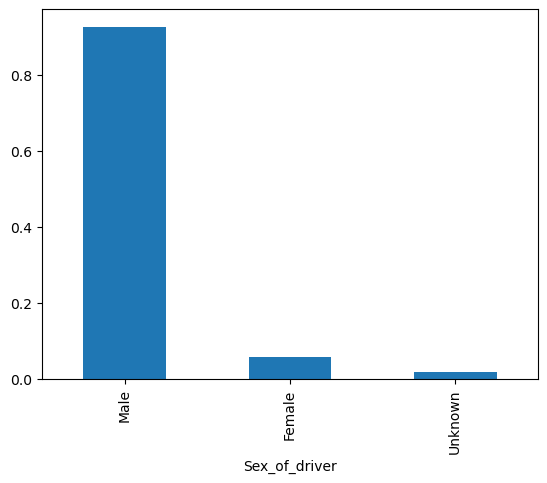

In [496]:
(df['Sex_of_driver'].value_counts() / len(df)).plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

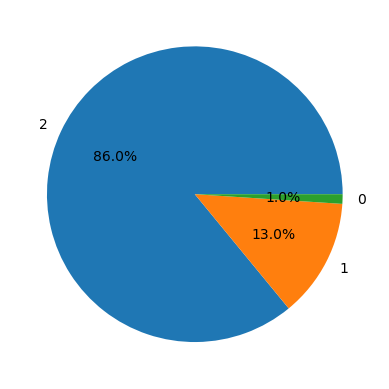

In [497]:
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%0.1f%%')
plt.show

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Number_of_casualties'>

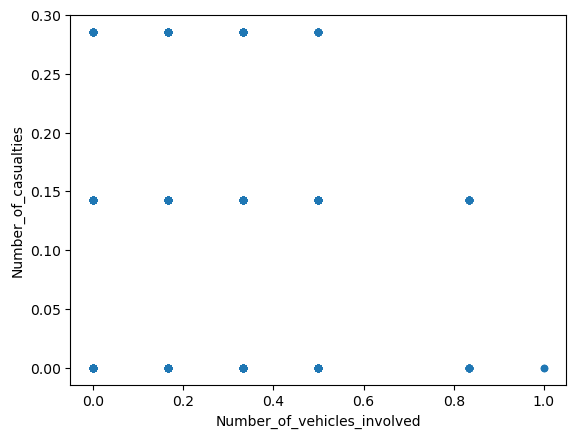

In [498]:
df.plot.scatter(x='Number_of_vehicles_involved', y='Number_of_casualties')

<Axes: xlabel='Time'>

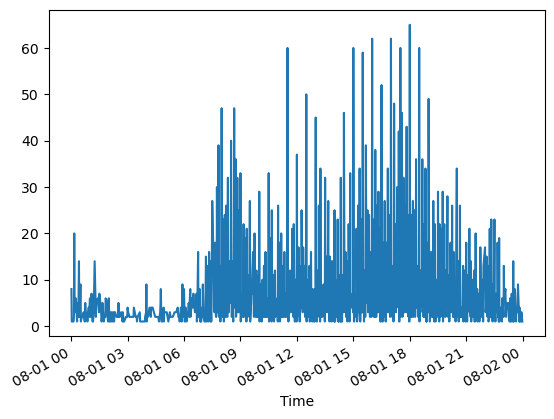

In [499]:
df['Time'].value_counts().sort_index().plot.line()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [500]:
feature_col=['Day_of_week','Age_band_of_driver','Sex_of_driver_encoding',
             'Educational_level','Type_of_vehicle', 'Cause_of_accident']


In [501]:
X= df[feature_col]
y= df['Accident_severity']

In [502]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [503]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


C:\Users\hayoo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [504]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)
y_pred_tree=tree_clf.predict(X_test)

#### Support Vector Machine (SVM)

In [505]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred_SVM = sgd_clf.predict(X_test)

#### K-Neighbors Classifier

In [506]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

knn_clf.fit(X_train, y_train)
y_pred_KNN = knn_clf.predict(X_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [507]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
print('Logistic Regression: ')
#Confusion Matrix
print("confusion_matrix",confusion_matrix(y_test, y_pred_log))

#Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_log)

#Precision and Recall
ps= precision_score(y_test, y_pred_log, average='micro')
print("precision score ", ps)

rs= recall_score(y_test, y_pred_log, average='micro')
print("recall score ", rs)

#F1 Score
f1= f1_score(y_test, y_pred_log, average='micro')
print("F1 score ", f1)
#ROC Curve and AUC

Logistic Regression: 
confusion_matrix [[   0    0   11]
 [   0    0  162]
 [   0    0 1302]]
Accuracy: 0.8827118644067796
precision score  0.8827118644067796
recall score  0.8827118644067796
F1 score  0.8827118644067796


In [508]:
#ROC Curve and AUC


fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)

auc = roc_auc_score(y_test, y_pred_log)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)


plot_roc_curve(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.legend(loc='best')
plt.show()

ValueError: multiclass format is not supported

In [509]:
print('DecisionTreeClassifier: ')
#Confusion Matrix
print("confusion_matrix", confusion_matrix(y_test, y_pred_tree))

#Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_dt)

#Precision and Recall
ps= precision_score(y_test, y_pred_tree, average='micro')
print("precision score ", ps)

rs= recall_score(y_test, y_pred_tree, average='micro')
print("recall score ", rs)
#F1 Score
f1= f1_score(y_test, y_pred_tree, average='micro')
print("F1 score ", f1)

DecisionTreeClassifier: 
confusion_matrix [[   0    0   11]
 [   0    0  162]
 [   0    0 1302]]
Accuracy: 0.8827118644067796
precision score  0.8827118644067796
recall score  0.8827118644067796
F1 score  0.8827118644067796


In [510]:
print('Support Vector Machine: ')
#Confusion Matrix
print("confusion_matrix", confusion_matrix(y_test, y_pred_SVM))

#accuracy
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print("Accuracy:", accuracy_SVM)


#Precision and Recall
ps= precision_score(y_test, y_pred_SVM, average='micro')
print("precision score ", ps)

rs= recall_score(y_test, y_pred_SVM, average='micro')
print("recall score ", rs)

#F1 Score
f1= f1_score(y_test, y_pred_SVM, average='micro')
print("F1 score ", f1)
#ROC Curve and AUC

Support Vector Machine: 
confusion_matrix [[   0    0   11]
 [   0    0  162]
 [   0    0 1302]]
Accuracy: 0.8827118644067796
precision score  0.8827118644067796
recall score  0.8827118644067796
F1 score  0.8827118644067796


In [511]:
print('KNN: ')
#Confusion Matrix
print("confusion_matrix",confusion_matrix(y_test, y_pred_log))

#Accuracy
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy_KNN)

#Precision and Recall
ps= precision_score(y_test, y_pred_KNN, average='micro')
print("precision score ", ps)

rs= recall_score(y_test, y_pred_KNN, average='micro')
print("recall score ", rs)

#F1 Score
f1= f1_score(y_test, y_pred_KNN, average='micro')
print("F1 score ", f1)
#ROC Curve and AUC


KNN: 
confusion_matrix [[   0    0   11]
 [   0    0  162]
 [   0    0 1302]]
Accuracy: 0.7905084745762712
precision score  0.7905084745762712
recall score  0.7905084745762712
F1 score  0.7905084745762712


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: The best model are Logistic Regression, Support Vector Machine and DecisionTreeClassifier with the accurcy 88%